In [14]:
##Empresa LOGISTICA S.A. requiere de un análisis en el comportamiento del uso de sus envases en los periodos 2021-2023

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#importar DF

df = pd.read_excel('C:\\Users\\Guillermo Edwards\\OneDrive\\Desktop\\CODERHOUSE\\Data Science I Fundamentos para la Ciencia de Datos\\Preentrega 1\\Dataset Envases SOP.xlsx')

print(df.head())

    Ce.  Alm.   Doc.mat.    Material                    Denomin.  CMv  \
0  1000  1004  502927101  800945-002     BANDEJA DOBLE RECICLADA  101   
1  1000  1004  502927105  800945-001          BANDEJA DOBLE (EX)  101   
2  1000  1004  502927110  800941-002      BANDEJA MINI RECICLADA  101   
3  1000  1004  502927113  800945-002     BANDEJA DOBLE RECICLADA  101   
4  1000  1004  502927118  800980-002  PALLETS ALAMO 1,0X1,20 UHT  101   

    Cantidad  UMB     Importe ML  Fecha doc.  ...      Hora      Lote  \
0       2160  UND        1231200  04.01.2021  ...  0.699618  10901523   
1       4320  UND        2851200  04.01.2021  ...  0.701123  10901529   
2       6300  UND        2841300  04.01.2021  ...  0.702396  10901532   
3       2160  UND        1231200  04.01.2021  ...  0.703808  10901534   
4        210  UND        1060500  04.01.2021  ...  0.712975  10901578   

       Usuario        Pedido  Referencia Cliente  Txt.cab.doc. Orden  \
0  3NCHAMORROP  1.850012e+09       52068     NaN  

In [17]:
#limpiar nombres columnas
df.columns = df.columns.str.strip()

print(df.columns.tolist())

['Ce.', 'Alm.', 'Doc.mat.', 'Material', 'Denomin.', 'CMv', 'Cantidad', 'UMB', 'Importe ML', 'Fecha doc.', 'Fe.contab.', 'Hora', 'Lote', 'Usuario', 'Pedido', 'Referencia', 'Cliente', 'Txt.cab.doc.', 'Orden', 'Proveedor', 'D/H']


In [18]:
#verificar info DF

print(df.dtypes)

print(df.info())

Ce.               int64
Alm.              int64
Doc.mat.          int64
Material         object
Denomin.         object
CMv               int64
Cantidad          int64
UMB              object
Importe ML        int64
Fecha doc.       object
Fe.contab.       object
Hora             object
Lote             object
Usuario          object
Pedido          float64
Referencia       object
Cliente         float64
Txt.cab.doc.     object
Orden           float64
Proveedor        object
D/H              object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7482 entries, 0 to 7481
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ce.           7482 non-null   int64  
 1   Alm.          7482 non-null   int64  
 2   Doc.mat.      7482 non-null   int64  
 3   Material      7482 non-null   object 
 4   Denomin.      7482 non-null   object 
 5   CMv           7482 non-null   int64  
 6   Cantidad      7482 non-nul

In [19]:
#limpiar columnas no necesarias
df.drop(['Ce.', 'Alm.', 'UMB', 'Orden', 'Hora', 'Lote', 'Usuario', 'Cliente', 'Referencia'], axis=1, inplace=True)

print(df.columns.tolist())

['Doc.mat.', 'Material', 'Denomin.', 'CMv', 'Cantidad', 'Importe ML', 'Fecha doc.', 'Fe.contab.', 'Pedido', 'Txt.cab.doc.', 'Proveedor', 'D/H']


In [20]:
#limpiar filas
valores_permitidos = ['800945-002', '800945-001', '800941-002', '800980-002', 
                      '800981-002', '800940-001', '800990-001', '800941-001', 
                      '900946-001', '800941-003']

df = df[df['Material'].isin(valores_permitidos)]

print(df.head())

valores_unicos = df['Material'].unique()
print(valores_unicos)

    Doc.mat.    Material                    Denomin.  CMv  Cantidad  \
0  502927101  800945-002     BANDEJA DOBLE RECICLADA  101      2160   
1  502927105  800945-001          BANDEJA DOBLE (EX)  101      4320   
2  502927110  800941-002      BANDEJA MINI RECICLADA  101      6300   
3  502927113  800945-002     BANDEJA DOBLE RECICLADA  101      2160   
4  502927118  800980-002  PALLETS ALAMO 1,0X1,20 UHT  101       210   

   Importe ML  Fecha doc.  Fe.contab.        Pedido Txt.cab.doc.  Proveedor  \
0     1231200  04.01.2021  04.01.2021  1.850012e+09      Playcar  780849304   
1     2851200  04.01.2021  04.01.2021  1.850012e+09        Wenco  921470002   
2     2841300  04.01.2021  04.01.2021  1.850012e+09      Logipak  763493512   
3     1231200  04.01.2021  04.01.2021  1.850012e+09      Playcar  780849304   
4     1060500  04.01.2021  04.01.2021  1.850012e+09     Pataguas  760802700   

  D/H  
0   S  
1   S  
2   S  
3   S  
4   S  
['800945-002' '800945-001' '800941-002' '800980-00

In [21]:
#Convertir columnas fecha
df['Fecha doc.'] = pd.to_datetime(df['Fecha doc.'], dayfirst=True)
df['Fe.contab.'] = pd.to_datetime(df['Fe.contab.'], dayfirst=True)

print(df.head())

print(df.dtypes)

print(df.info())

    Doc.mat.    Material                    Denomin.  CMv  Cantidad  \
0  502927101  800945-002     BANDEJA DOBLE RECICLADA  101      2160   
1  502927105  800945-001          BANDEJA DOBLE (EX)  101      4320   
2  502927110  800941-002      BANDEJA MINI RECICLADA  101      6300   
3  502927113  800945-002     BANDEJA DOBLE RECICLADA  101      2160   
4  502927118  800980-002  PALLETS ALAMO 1,0X1,20 UHT  101       210   

   Importe ML Fecha doc. Fe.contab.        Pedido Txt.cab.doc.  Proveedor D/H  
0     1231200 2021-01-04 2021-01-04  1.850012e+09      Playcar  780849304   S  
1     2851200 2021-01-04 2021-01-04  1.850012e+09        Wenco  921470002   S  
2     2841300 2021-01-04 2021-01-04  1.850012e+09      Logipak  763493512   S  
3     1231200 2021-01-04 2021-01-04  1.850012e+09      Playcar  780849304   S  
4     1060500 2021-01-04 2021-01-04  1.850012e+09     Pataguas  760802700   S  
Doc.mat.                 int64
Material                object
Denomin.                object


In [22]:
#Agregar columna tipo envase

bandejas_virgenes = ['800945-001', '800940-001', '800990-001', '800941-001', '900946-001']
bandejas_recicladas = ['800945-002', '800941-002', '800941-003']
pallets = ['800980-002', '800981-002']

df['Tipo Envase'] = df['Material'].apply(
    lambda x: 'Bandeja Virgen' if x in bandejas_virgenes
                                else 'Bandeja Reciclada' if x in bandejas_recicladas
                                                            else 'Pallet' if x in pallets 
                                                                            else 'NA'
                                                                                    )

print(df[['Material', 'Tipo Envase']].head())

     Material        Tipo Envase
0  800945-002  Bandeja Reciclada
1  800945-001     Bandeja Virgen
2  800941-002  Bandeja Reciclada
3  800945-002  Bandeja Reciclada
4  800980-002             Pallet


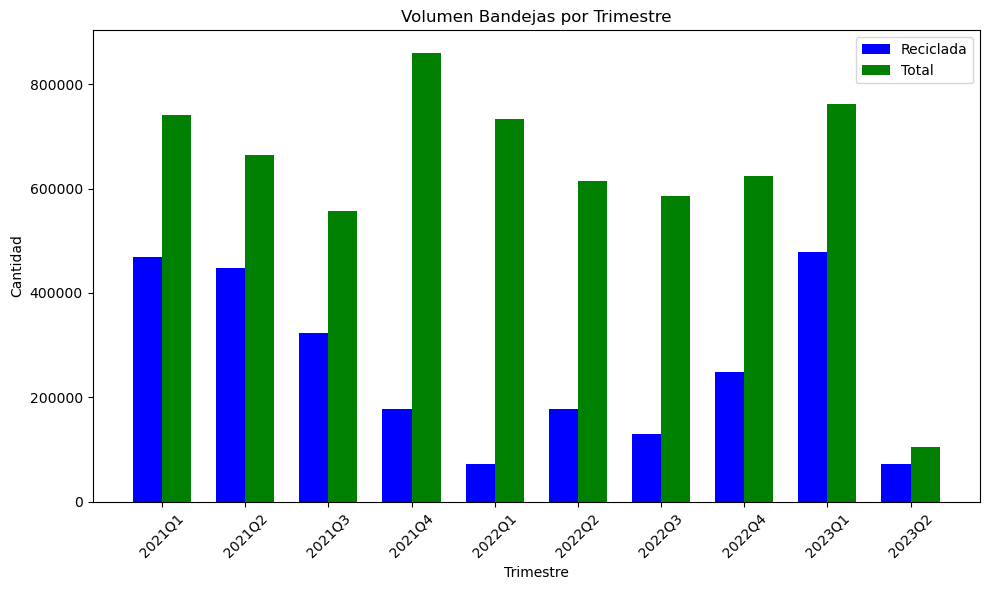

                    Cantidad_Reciclada  Cantidad_Total
Cantidad_Reciclada            1.000000        0.408637
Cantidad_Total                0.408637        1.000000


In [29]:
#Pregunta 1: estacionalidad bandejas recicladas (trimestral)


#Columna Trimestre
df['Trimestre'] = df['Fe.contab.'].dt.to_period('Q')

#Filtro
df_CompraR = df[(df['CMv'].isin([101, 102])) & (df['Tipo Envase'] == 'Bandeja Reciclada')]
df_CompraT = df[(df['CMv'].isin([101, 102])) & (df['Tipo Envase'].str.startswith('Bandeja'))]

#Cantidad de compra por trimestre
CantidadR_Tri = df_CompraR.groupby('Trimestre')['Cantidad'].sum().reset_index()
CantidadT_Tri = df_CompraT.groupby('Trimestre')['Cantidad'].sum().reset_index()


#Gráfico
fig, ax = plt.subplots(figsize=(10, 6))

#ancho barras
AnchBarr = 0.35

#posición barras
r1 = np.arange(len(CantidadR_Tri))
r2 = [x + AnchBarr for x in r1]

ax.bar(r1, CantidadR_Tri['Cantidad'], color='b', width=AnchBarr, label='Reciclada')
ax.bar(r2, CantidadT_Tri['Cantidad'], color='g', width=AnchBarr, label='Total')
ax.set_xlabel('Trimestre')
ax.set_ylabel('Cantidad')
ax.set_title('Volumen Bandejas por Trimestre')
ax.set_xticks([r + AnchBarr / 2 for r in range(len(CantidadR_Tri))])
ax.set_xticklabels(CantidadR_Tri['Trimestre'].astype(str), rotation=45)
ax.legend()
plt.tight_layout()


plt.show()


df_Vol = pd.merge(CantidadR_Tri[['Trimestre', 'Cantidad']], CantidadT_Tri[['Trimestre', 'Cantidad']], on='Trimestre', suffixes=('_Reciclada', '_Total'))
Corr_Vol = df_Vol[['Cantidad_Reciclada', 'Cantidad_Total']].corr()
                      
print(Corr_Vol)     

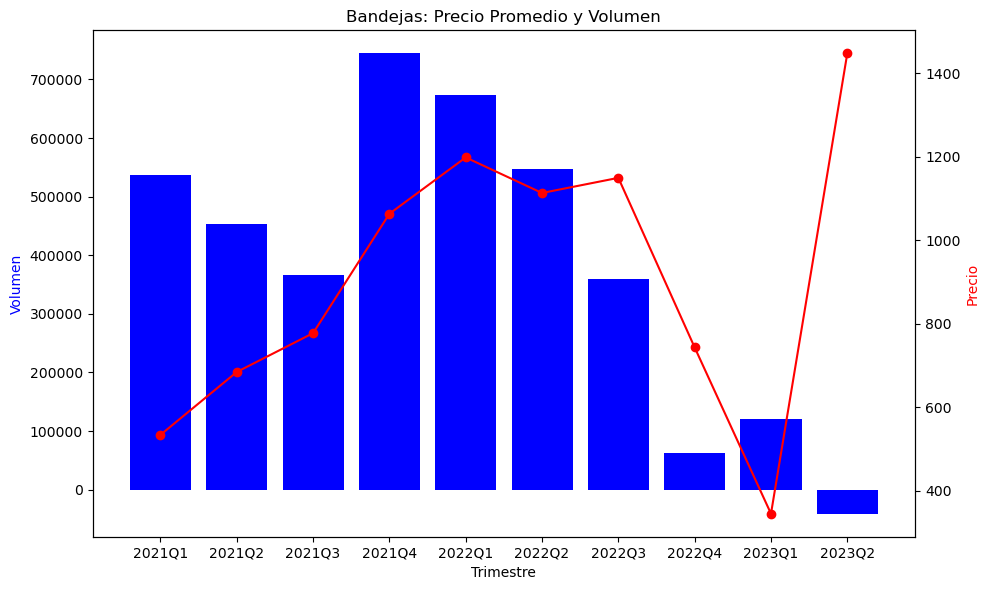

          Cantidad    Precio
Cantidad  1.000000  0.085107
Precio    0.085107  1.000000


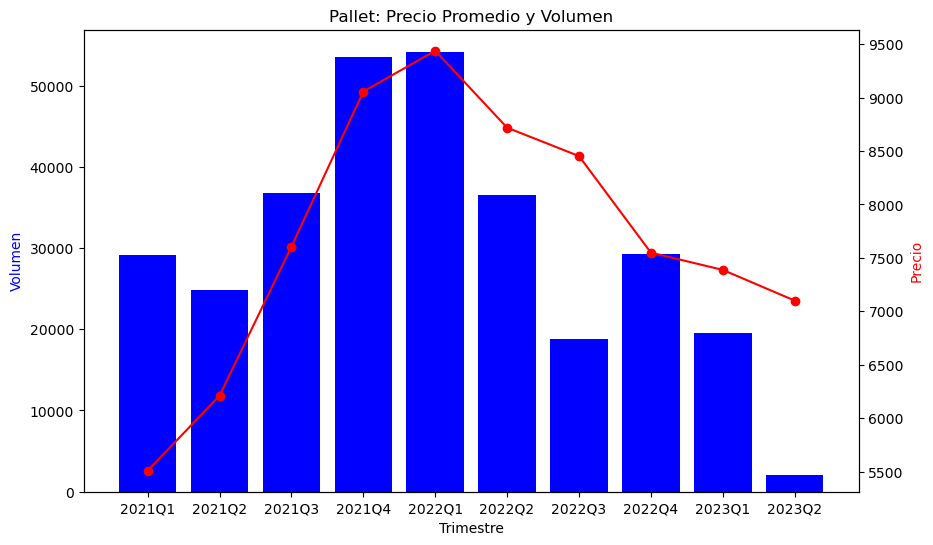

          Cantidad    Precio
Cantidad  1.000000  0.569623
Precio    0.569623  1.000000


In [20]:
#Hipótesis 2) a mayor volumen de compra, mayor precio promedio de compra.

#Filtro Bandejas
df_CompraB = df[(df['CMv'].isin([101])) & (df['Tipo Envase'] == 'Bandeja Reciclada') | (df['Tipo Envase'] == 'Bandeja Virgen')]

#Filtro Pallet
df_CompraP = df[(df['CMv'].isin([101])) & (df['Tipo Envase'] == 'Pallet')]
                                           
                                           

#Cantidad e Importe compra bandejas por trimestre
Bandejas_Tri = df_CompraB.groupby('Trimestre')[['Cantidad', 'Importe ML']].sum().reset_index()
                                           
#Precio Promedio Bandejas
Bandejas_Tri['Precio'] = Bandejas_Tri['Importe ML']/Bandejas_Tri['Cantidad']
                                           
#Gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))  

ax1.bar(Bandejas_Tri['Trimestre'].astype(str), Bandejas_Tri['Cantidad'], color='b', label='Volumen')
ax1.set_xlabel('Trimestre')
ax1.set_ylabel('Volumen', color='b')

ax2 = ax1.twinx()
ax2.plot(Bandejas_Tri['Trimestre'].astype(str), Bandejas_Tri['Precio'], color='r', marker='o', label='Precio Promedio')
ax2.set_ylabel('Precio', color='r')                        

plt.title('Bandejas: Precio Promedio y Volumen')                        
fig.tight_layout()                        
                        
plt.show() 

#Correlación Precio Volumen
Corr_B = Bandejas_Tri[['Cantidad', 'Precio']].corr()
                      
print(Corr_B)                      
                        
                        
                        
                        
#Cantidad e Importe compra pallet por trimestre
Pallet_Tri = df_CompraP.groupby('Trimestre')[['Cantidad', 'Importe ML']].sum().reset_index()
                                           
#Precio Promedio Pallet
Pallet_Tri['Precio'] = Pallet_Tri['Importe ML']/Pallet_Tri['Cantidad']
                                           
#Gráfico
fig2, ax1 = plt.subplots(figsize=(10, 6))                                           

ax1.bar(Pallet_Tri['Trimestre'].astype(str), Pallet_Tri['Cantidad'], color='b', label='Volumen')
ax1.set_xlabel('Trimestre')
ax1.set_ylabel('Volumen', color='b')

ax2 = ax1.twinx()
ax2.plot(Pallet_Tri['Trimestre'].astype(str), Pallet_Tri['Precio'], color='r', marker='o', label='Precio Promedio')
ax2.set_ylabel('Precio', color='r')                        

plt.title('Pallet: Precio Promedio y Volumen')                        
fig.tight_layout()                        
                        
plt.show()                         
                      
                      
#Correlación Precio Volumen
Corr_P = Pallet_Tri[['Cantidad', 'Precio']].corr()
                      
print(Corr_P)                      

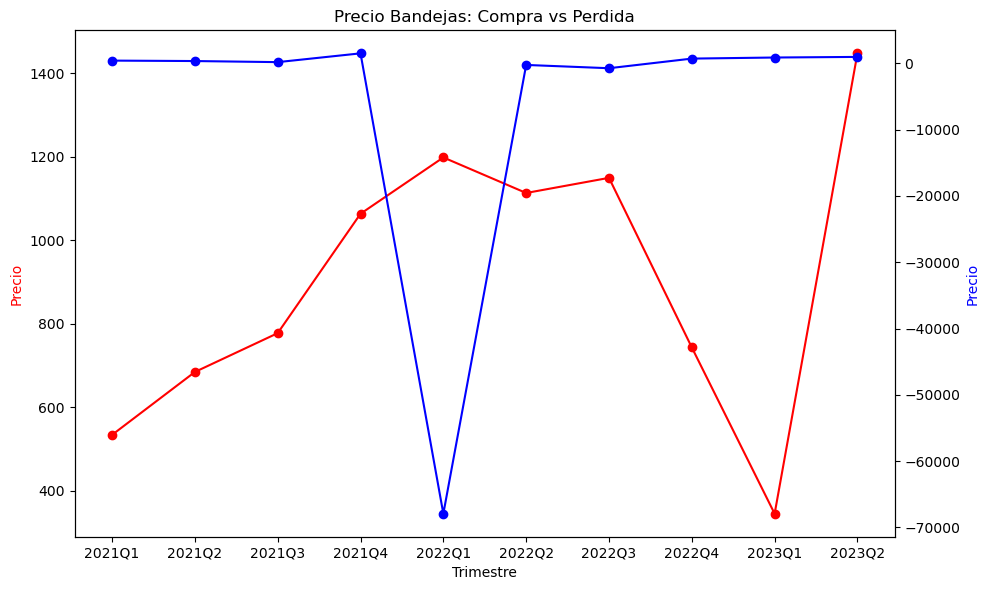

                Precio_compra  Precio_perdida
Precio_compra        1.000000       -0.303802
Precio_perdida      -0.303802        1.000000


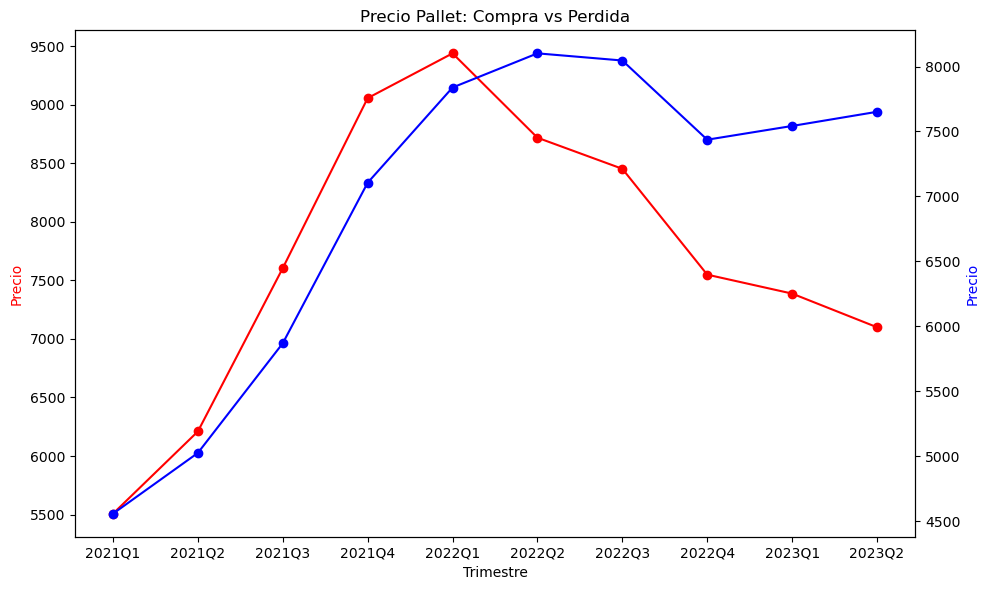

                Precio_compra  Precio_perdida
Precio_compra        1.000000        0.779426
Precio_perdida       0.779426        1.000000


In [22]:
#Hipótesis 3) Precio Pérdida vs Precio Compra

#Filtro Bandejas
df_PerdidaB = df[(df['CMv'].isin([711])) & (df['Tipo Envase'] == 'Bandeja Reciclada') | (df['Tipo Envase'] == 'Bandeja Virgen')]

#Filtro Pallet
df_PerdidaP = df[(df['CMv'].isin([711])) & (df['Tipo Envase'] == 'Pallet')]
                                           
                                           

#Cantidad e Costo perdida bandejas por trimestre
PerB_Tri = df_PerdidaB.groupby('Trimestre')[['Cantidad', 'Importe ML']].sum().reset_index()
                                           
#Precio Promedio Perdida Bandejas
PerB_Tri['Precio'] = PerB_Tri['Importe ML']/PerB_Tri['Cantidad']

#Gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))                                           
ax1.plot(Bandejas_Tri['Trimestre'].astype(str), Bandejas_Tri['Precio'], color='r', marker='o', label='Precio Compra')
ax1.set_xlabel('Trimestre')
ax1.set_ylabel('Precio', color='r')

ax2 = ax1.twinx()
ax2.plot(PerB_Tri['Trimestre'].astype(str), PerB_Tri['Precio'], color='b', marker='o', label='Precio Perdida')
ax2.set_ylabel('Precio', color='b') 

plt.title('Precio Bandejas: Compra vs Perdida')                        
fig.tight_layout()                        
                        
plt.show() 

#Correlación Precio Volumen
df_PreciosB = pd.merge(Bandejas_Tri[['Trimestre', 'Precio']], PerB_Tri[['Trimestre', 'Precio']], on='Trimestre', suffixes=('_compra', '_perdida'))
Corr_PrecioB = df_PreciosB[['Precio_compra', 'Precio_perdida']].corr()
                      
print(Corr_PrecioB)     




#Cantidad e Costo perdida pallet por trimestre
PerP_Tri = df_PerdidaP.groupby('Trimestre')[['Cantidad', 'Importe ML']].sum().reset_index()
                                           
#Precio Promedio Perdida Pallet
PerP_Tri['Precio'] = PerP_Tri['Importe ML']/PerP_Tri['Cantidad']

#Gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))                                           
ax1.plot(Pallet_Tri['Trimestre'].astype(str), Pallet_Tri['Precio'], color='r', marker='o', label='Precio Compra')
ax1.set_xlabel('Trimestre')
ax1.set_ylabel('Precio', color='r')

ax2 = ax1.twinx()
ax2.plot(PerP_Tri['Trimestre'].astype(str), PerP_Tri['Precio'], color='b', marker='o', label='Precio Perdida')
ax2.set_ylabel('Precio', color='b') 

plt.title('Precio Pallet: Compra vs Perdida')                        
fig.tight_layout()                        
                        
plt.show() 

#Correlación Precio Volumen
df_PreciosP = pd.merge(Pallet_Tri[['Trimestre', 'Precio']], PerP_Tri[['Trimestre', 'Precio']], on='Trimestre', suffixes=('_compra', '_perdida'))
Corr_PrecioP = df_PreciosP[['Precio_compra', 'Precio_perdida']].corr()
                      
print(Corr_PrecioP)     